 

<center><h1>Real-Time Location System Case Study 1</h1> </center>

<center><h2>My Group</h2> </center>

<br/>

<center><h2>January, 18 2019</h2></center>

## Checklist
* thorough data analysis into these two MAC addresses
    * determining locations by using data corresponding to both MAC addresses
* which of the two MAC addresses should and shouldn’t be used for RTLS
* which MAC has best location prediction
* if using both MAC address data, how does that effect location prediction
    * this portion is derived from Exercise Q.9 in Nolan and Lang
* use this different KNN prediction method
    * use weights on the received signal strength, where the weight is inversely proportional to the “distance” from the test observation
        * This allows for the “nearest” points to have a greater contribution to the k-nearest neighbor location calculation than the points that are “further” away
    * what range of values of weights are you able to obtain better prediction values than for the unweighted k-nearest neighbor approach?
    * Use calcError() to compare this approach to the simple average.
* Include an introduction to explain the case study, explain the approach used to complete the case study and explain the output achieved.  Explanations of output should be included as close to the output or figures as possible.
* List all references used, including the book by Nolan and Lang

<br/>
<br/>

<center>  **Abstract** </center>

Write up Abstract here

## 1 Introduction

There is a growing need to track the location of people inside buildings. Since global positioning systems (GPS) use signals obtained from satellites to determine the user's location at a point in time, GPS signals become scattered inside buildings due to roofs, walls, etc. that they are unable to accurately track a user's location inside a building. Indoor positioning systems (IPS) must be used in lieu of GPS to track people reliably within buildings. IPS uses "WiFi signals detected from network access points" [1] to locate devices on the network in real time. 

The datasets used for this case study were available on the Community Resource for Archiving Wireless Data at Dartmouth (CRAWDAD) website. For this case study, the dataset was downloaded from the course textbook's website: http://rdatasciencecases.org/Data.html. The dataset is described as "traces of signal strength of 802.11 APs for the COMPASS positioning system." [2] By measuring the signal strength at known points throughout the building, an IPS can be built by training the model. The model to predict the location of a device will be based on the signal strength between the device and the different access points. This case study will focus on using k nearest neighbors to predict the location of the device.

<span style="color: red">Add more details regarding the k-nearest neighbors methods </span>

**Euclidean distance formula if we need it**
<center>$\sqrt{(S_{1}^{*}-S_{1})^{2}+\cdots+(S_{6}^{*}-S_{6})^{2}}$     (1) </center>

<br/>

## 2 Methods

For the case study, the offline dataset was imported to train and build a model. After reviewing the import of the raw data file, values for each variable were extracted. Then, the data was cleaned up before building the model. 

The effectiveness of the location prediction was tested by using the online dataset. <span style="color: red">Add more stuff about methods used, fix this section</span>

#### Data Description

**Offline Dataset**

The offine dataset "contains signal strengths measured using a hand-held device on a grid of 166 points spaced 1 meter apart in the hallways of one floor of a building at the University of Mannheim." [1] 


#### Data Import and Processing

<br/>

## 3 Results

### MAC Address 00:0f:a3:39:e1:c0  Distribution Analysis

Based on the given location, the distribution can be compared to one another to see if there is any predictive power in location. When looking at the MAC Address 00:0f:a3:39:e1:c0, we see from the box plots that there is strong signal strength in that given location. Indicating that it may predictive power for that given area. When looking at the densities for the given MAC address, there is some normal distributions but there is also good majority that is left skew. Also when looking at the Mean Signal vs. Standard Deviaton of Signal for the given MAC address, there is some high variability in the stronger signals.

null device 
          1

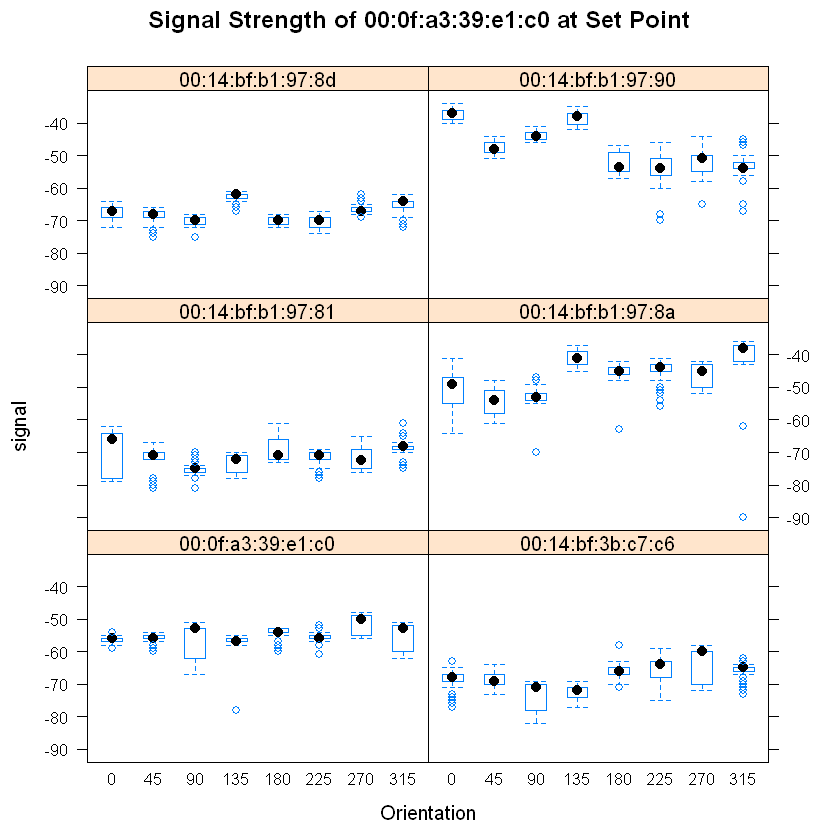

In [23]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar = par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offlineRedo, xlab= "Orientation", main="Signal Strength of 00:0f:a3:39:e1:c0 at Set Point",
       subset = posX == 2 & posY == 12 
                & mac != "00:0f:a3:39:dd:cd", 
       layout = c(2,3))

par(oldPar)
dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -93     -64     -58     -58     -51     -25 

null device 
          1

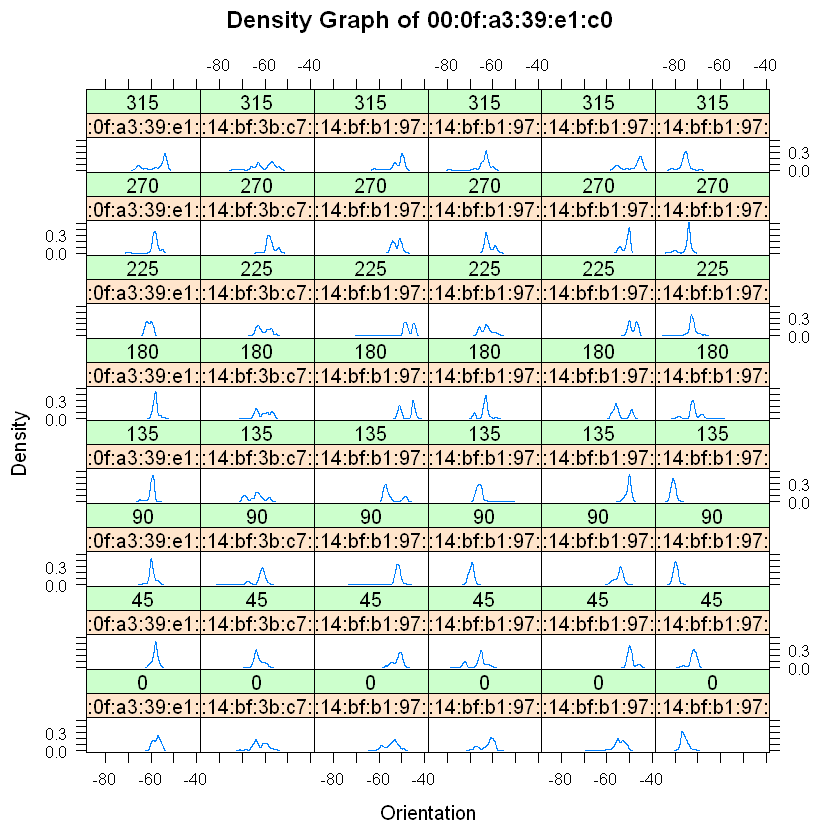

In [25]:
summary(offlineRedo$signal)

#pdf(file = "Geo_DensitySignalByMacAngle.pdf", width = 8, height = 12)
oldPar = par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offlineRedo, xlab= "Orientation", main="Density Graph of 00:0f:a3:39:e1:c0",
             subset = posX == 24 & posY == 4 & 
                         mac != "00:0f:a3:39:dd:cd",
             bw = 0.5, plot.points = FALSE)

par(oldPar)
dev.off()

In [20]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offlineRedo$posXY = paste(offlineRedo$posX, offlineRedo$posY, sep = "-")

byLocAngleAPRedo = with(offlineRedo, 
                    by(offlineRedo, list(posXY, angle, mac), 
                       function(x) x))

In [21]:
signalSummaryRedo = 
  lapply(byLocAngleAPRedo,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

null device 
          1

null device 
          1

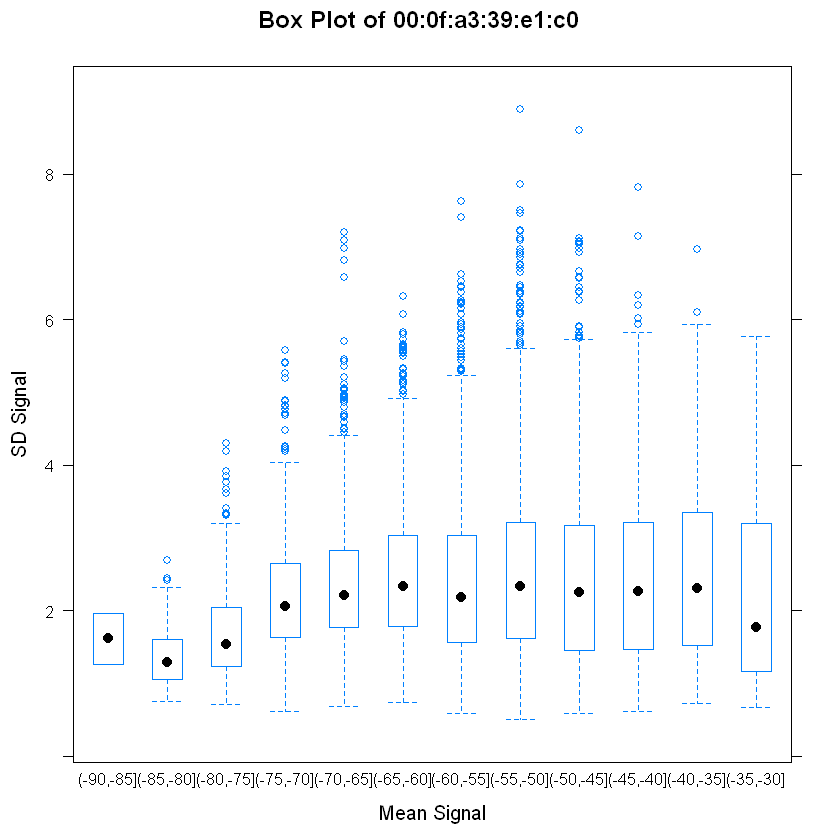

In [28]:
offlineSummaryRedo = do.call("rbind", signalSummaryRedo)     

#pdf(file = "Geo_BoxplotSignalSDByAvg.pdf", width = 10)
oldPar = par(mar = c(3.1, 3, 1, 1))

breaks = seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),
       data = offlineSummaryRedo, 
       subset = mac != "00:0f:a3:39:dd:cd",main="Box Plot of 00:0f:a3:39:e1:c0",
       xlab = "Mean Signal", ylab = "SD Signal")

par(oldPar)
dev.off()

#pdf(file = "Geo_ScatterMean-Median.pdf", width = 10)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

with(offlineSummaryRedo,
     smoothScatter((avgSignal - medSignal) ~ num, 
                   xlab = "Number of Observations", 
                   ylab = "mean - median"))
abline(h = 0, col = "#984ea3", lwd = 2)
lo.obj = 
  with(offlineSummaryRedo,
       loess(diff ~ num, 
             data = data.frame(diff = (avgSignal - medSignal),
                               num = num)))

lo.obj.pr = predict(lo.obj, newdata = data.frame(num = (70:120)))
lines(x = 70:120, y = lo.obj.pr, col = "#4daf4a", lwd = 2)

par(oldPar)
dev.off()

### MAC Address 00:0f:a3:39:dd:cd Distribution Analysis

Based on the graphs show below, with the given MAC Address 00:0f:a3:39:dd:cd, there is low signal strength at the given location. Also when looking at the density graphs, the given MAC Address seems to have more left skewness in many of its distribution. Also when looking at the box of the average signal and standard deviaton, there seems to be high variability in the low signal strength with also high variability in the high signal strength. This could indicate better predictability of location since there is more variability in the low signal strength area. 

null device 
          1

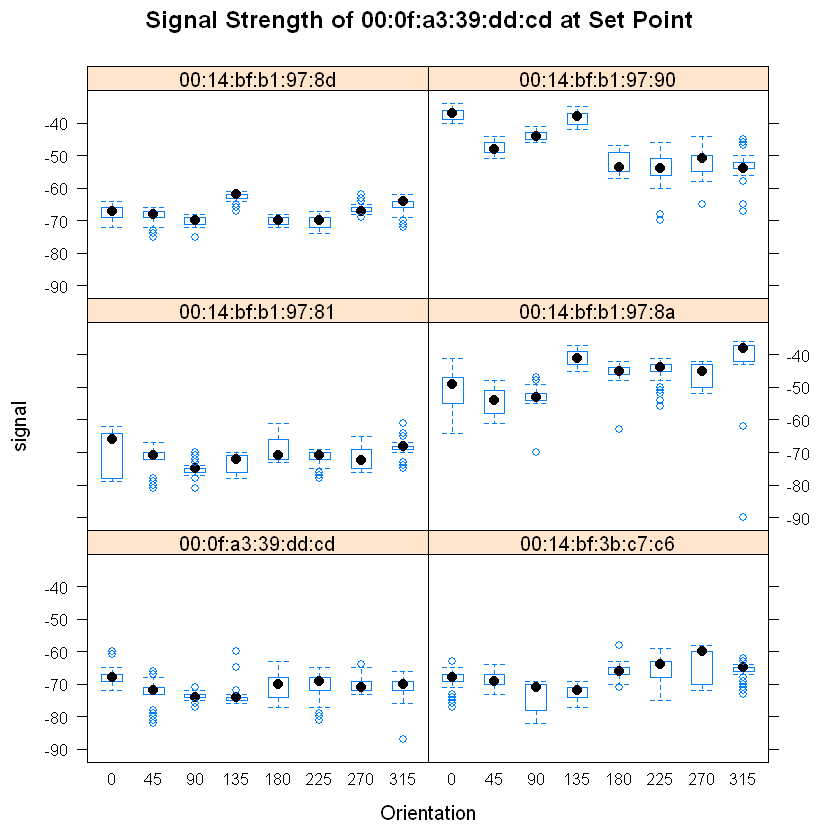

In [32]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar = par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offlinenew, xlab= "Orientation", main="Signal Strength of 00:0f:a3:39:dd:cd at Set Point",
       subset = posX == 2 & posY == 12 
                , 
       layout = c(2,3))

par(oldPar)
dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -98     -69     -61     -61     -54     -25 

null device 
          1

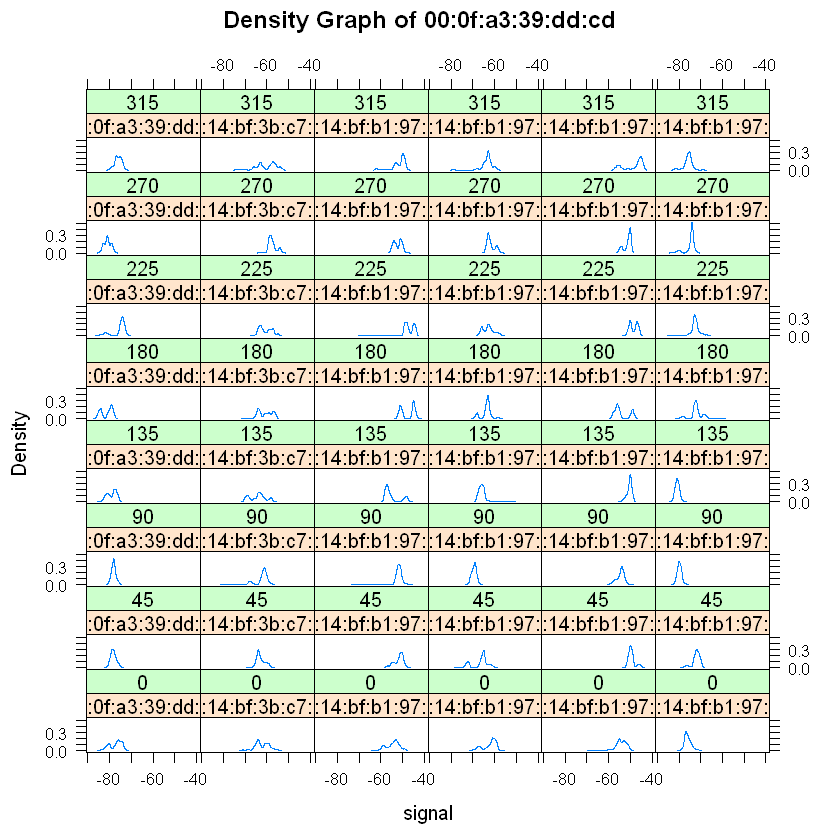

In [33]:
summary(offlinenew$signal)

#pdf(file = "Geo_DensitySignalByMacAngle.pdf", width = 8, height = 12)
oldPar = par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offlinenew,main="Density Graph of 00:0f:a3:39:dd:cd",
             subset = posX == 24 & posY == 4,
             bw = 0.5, plot.points = FALSE)

par(oldPar)
dev.off()

In [29]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offlinenew$posXY = paste(offlinenew$posX, offlinenew$posY, sep = "-")

byLocAngleAPnew = with(offlinenew, 
                    by(offlinenew, list(posXY, angle, mac), 
                       function(x) x))

In [30]:
signalSummarynew = 
  lapply(byLocAngleAPnew,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

null device 
          1

null device 
          1

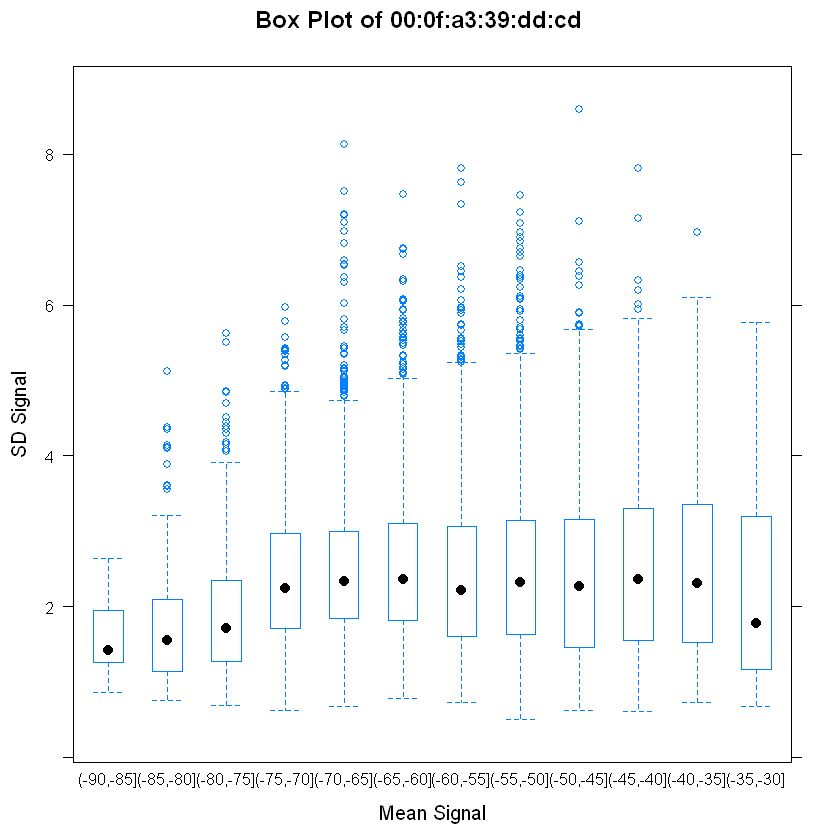

In [34]:
offlineSummarynew = do.call("rbind", signalSummarynew)     

#pdf(file = "Geo_BoxplotSignalSDByAvg.pdf", width = 10)
oldPar = par(mar = c(3.1, 3, 1, 1))

breaks = seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),main="Box Plot of 00:0f:a3:39:dd:cd",
       data = offlineSummarynew, 
       
       xlab = "Mean Signal", ylab = "SD Signal")

par(oldPar)
dev.off()

#pdf(file = "Geo_ScatterMean-Median.pdf", width = 10)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

with(offlineSummarynew,
     smoothScatter((avgSignal - medSignal) ~ num,
                   xlab = "Number of Observations", 
                   ylab = "mean - median"))
abline(h = 0, col = "#984ea3", lwd = 2)
lo.obj = 
  with(offlineSummarynew,
       loess(diff ~ num, 
             data = data.frame(diff = (avgSignal - medSignal),
                               num = num)))

lo.obj.pr = predict(lo.obj, newdata = data.frame(num = (70:120)))
lines(x = 70:120, y = lo.obj.pr, col = "#4daf4a", lwd = 2)

par(oldPar)
dev.off()

### Both MAC Address Distribution Analysis

When looking at the boxplots for the set location, we can see that there is some difference in signal strength between the two MAC Address. This could indicate more predicatbility in the model since there is more variability in the data and can pick up signals that the other could not pick up. However, there is possibility the two signals could be similar in a statistical sense, so more analysis would need to be done on this. When looking at the box plot of Average Signal and Standard deviaton of signals, there seems to higher variability in the lower signal area compared to the other MAC Addresses plots. This could indicate better predicatability since there is more ability to pick up signals in this sepectrum allowing for more accuracy in predictions of locations. 

null device 
          1

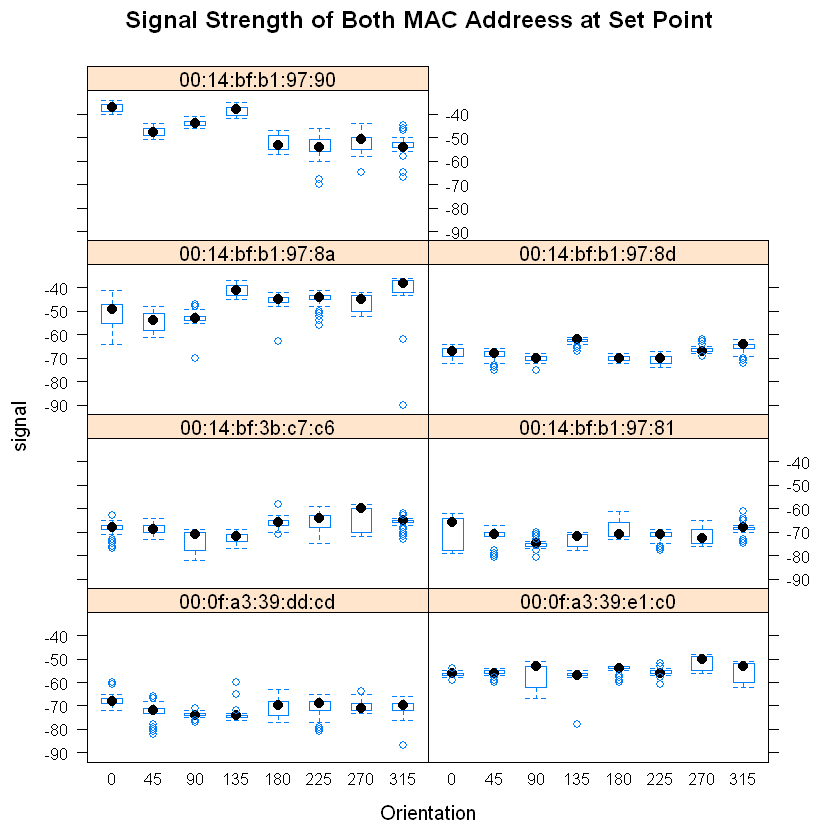

In [35]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar = par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offlineBoth, xlab= "Orientation",main="Signal Strength of Both MAC Addreess at Set Point",
       subset = posX == 2 & posY == 12 
                , 
       layout = c(2,4))

par(oldPar)
dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -98     -67     -59     -60     -53     -25 

null device 
          1

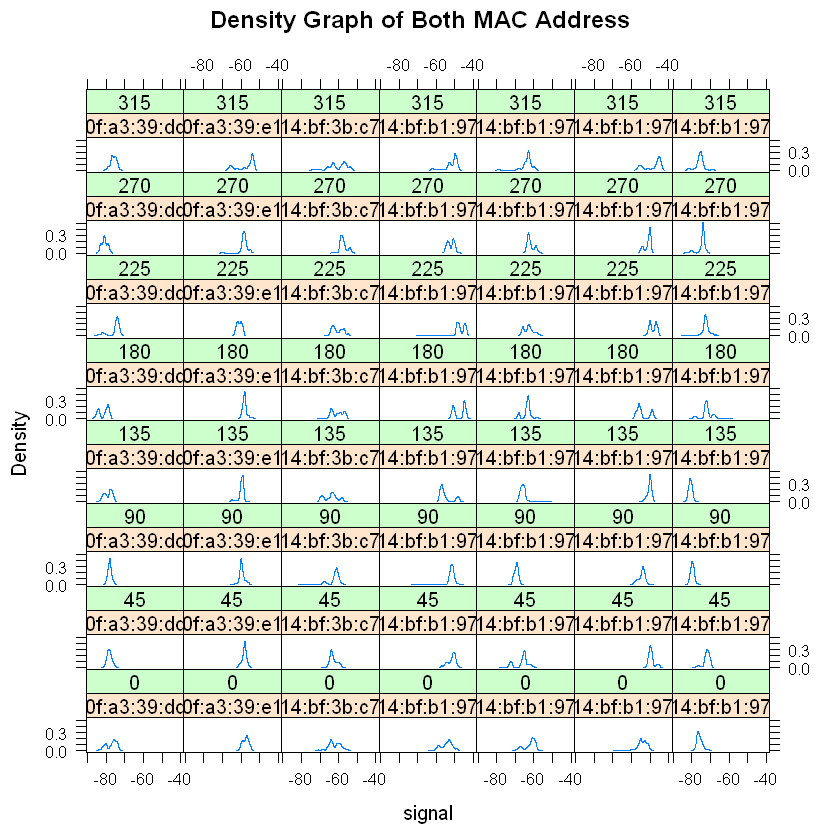

In [36]:
summary(offlineBoth$signal)

#pdf(file = "Geo_DensitySignalByMacAngle.pdf", width = 8, height = 12)
oldPar = par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offlineBoth, main="Density Graph of Both MAC Address",
             subset = posX == 24 & posY == 4,
             bw = 0.5, plot.points = FALSE)

par(oldPar)
dev.off()

In [37]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offlineBoth$posXY = paste(offlineBoth$posX, offlineBoth$posY, sep = "-")

byLocAngleAPBoth = with(offlineBoth, 
                    by(offlineBoth, list(posXY, angle, mac), 
                       function(x) x))

In [38]:
signalSummaryBoth = 
  lapply(byLocAngleAPBoth,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

null device 
          1

null device 
          1

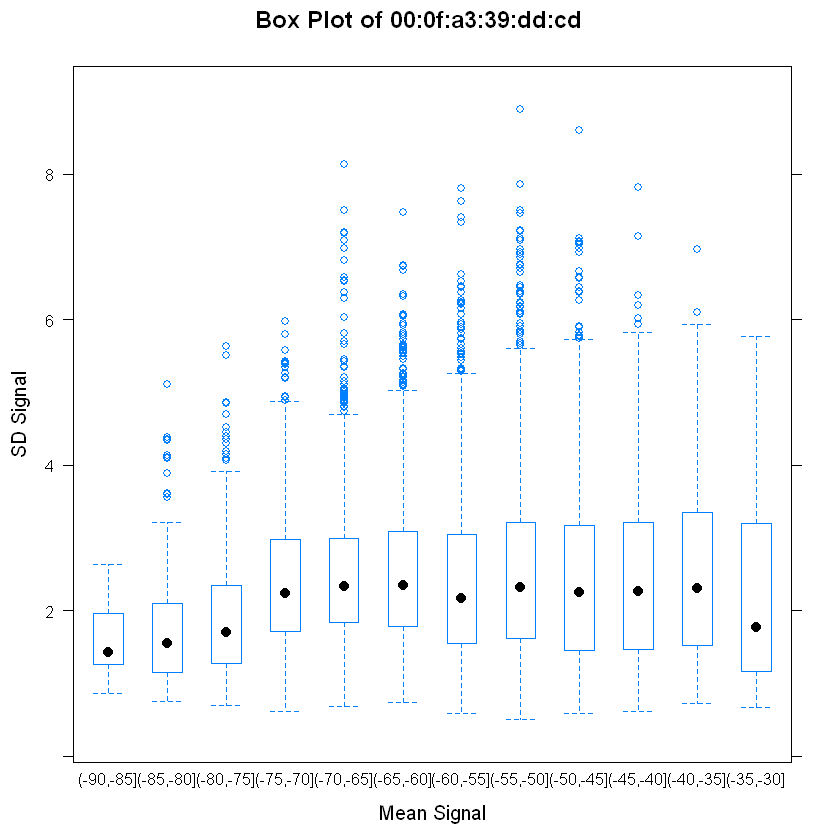

In [40]:
offlineSummaryBoth = do.call("rbind", signalSummaryBoth)     

#pdf(file = "Geo_BoxplotSignalSDByAvg.pdf", width = 10)
oldPar = par(mar = c(3.1, 3, 1, 1))

breaks = seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),main="Box Plot of 00:0f:a3:39:dd:cd",
       data = offlineSummaryBoth, 
       
       xlab = "Mean Signal", ylab = "SD Signal")

par(oldPar)
dev.off()

#pdf(file = "Geo_ScatterMean-Median.pdf", width = 10)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

with(offlineSummaryBoth,
     smoothScatter((avgSignal - medSignal) ~ num,
                   xlab = "Number of Observations", 
                   ylab = "mean - median"))
abline(h = 0, col = "#984ea3", lwd = 2)
lo.obj = 
  with(offlineSummaryBoth,
       loess(diff ~ num, 
             data = data.frame(diff = (avgSignal - medSignal),
                               num = num)))

lo.obj.pr = predict(lo.obj, newdata = data.frame(num = (70:120)))
lines(x = 70:120, y = lo.obj.pr, col = "#4daf4a", lwd = 2)

par(oldPar)
dev.off()

## 4 Conclusion

Conclusion

<br/>

## Appendix

### References
1. Nolan, Deborah, and Duncan Temple Lang. Data Science in R: a Case Studies Approach to Computational Reasoning and Problem Solving. Crc Press Inc., 2015.
2. Thomas King, Stephan Kopf, Thomas Haenselmann, Christian Lubberger, Wolfgang Effelsberg, CRAWDAD dataset mannheim/compass (v. 2008‑04‑11), downloaded from https://crawdad.org/mannheim/compass/20080411, Apr 2008.

*Need to cite Slater's code Unit2-Cluster*

## A Code

### Generic Code to Pull Raw

In [1]:
options(digits = 2)

txt = readLines("offline.final.trace.txt")

sum(substr(txt, 1, 1) == "#")

length(txt)

strsplit(txt[4], ";")[[1]]

tokens = strsplit(txt[4], "[;=,]")[[1]]

tokens[1:10]

tokens[c(2, 4, 6:8, 10)]

tokens[ - ( 1:10 ) ]

tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
mat = cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
                   ncol = 6, byrow = TRUE), 
            tmp)

dim(mat)

processLine =
function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
               ncol = 6, byrow = TRUE), tmp)
}

tmp = lapply(txt[4:20], processLine)

sapply(tmp, nrow)

offline = as.data.frame(do.call("rbind", tmp))
dim(offline)

lines = txt[ substr(txt, 1, 1) != "#" ]
tmp = lapply(lines, processLine)

processLine = function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  
  if (length(tokens) == 10) 
    return(NULL)
 
  tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6, 
               byrow = TRUE), tmp)
}

options(error = recover, warn = 1)
tmp = lapply(lines, processLine)
offline = as.data.frame(do.call("rbind", tmp), 
                        stringsAsFactors = FALSE)


[1] 5312

[1] 151392

[1] "t=1139643118358"                    "id=00:02:2D:21:0F:33"              
 [3] "pos=0.0,0.0,0.0"                    "degree=0.0"                        
 [5] "00:14:bf:b1:97:8a=-38,2437000000,3" "00:14:bf:b1:97:90=-56,2427000000,3"
 [7] "00:0f:a3:39:e1:c0=-53,2462000000,3" "00:14:bf:b1:97:8d=-65,2442000000,3"
 [9] "00:14:bf:b1:97:81=-65,2422000000,3" "00:14:bf:3b:c7:c6=-66,2432000000,3"
[11] "00:0f:a3:39:dd:cd=-75,2412000000,3" "00:0f:a3:39:e0:4b=-78,2462000000,3"
[13] "00:0f:a3:39:e2:10=-87,2437000000,3" "02:64:fb:68:52:e6=-88,2447000000,1"
[15] "02:00:42:55:31:00=-84,2457000000,1"

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"

[1] "1139643118358"     "00:02:2D:21:0F:33" "0.0"              
[4] "0.0"               "0.0"               "0.0"

[1] "00:14:bf:b1:97:8a" "-38"               "2437000000"       
 [4] "3"                 "00:14:bf:b1:97:90" "-56"              
 [7] "2427000000"        "3"                 "00:0f:a3:39:e1:c0"
[10] "-53"               "2462000000"        "3"                
[13] "00:14:bf:b1:97:8d" "-65"               "2442000000"       
[16] "3"                 "00:14:bf:b1:97:81" "-65"              
[19] "2422000000"        "3"                 "00:14:bf:3b:c7:c6"
[22] "-66"               "2432000000"        "3"                
[25] "00:0f:a3:39:dd:cd" "-75"               "2412000000"       
[28] "3"                 "00:0f:a3:39:e0:4b" "-78"              
[31] "2462000000"        "3"                 "00:0f:a3:39:e2:10"
[34] "-87"               "2437000000"        "3"                
[37] "02:64:fb:68:52:e6" "-88"               "2447000000"       
[40] "1"                 "02:00:42:55:31:00" "-84"              
[43] "2457000000"        "1"

[1] 11 10

[1] 11 10 10 11  9 10  9  9 10 11 11  9  9  9  8 10 14

[1] 170  10

Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"

### Creates the field names and also changes the formatting of the variables to numeric since all were character before. Drops the adhoc data and coverts the time to milliseconds

In [2]:
dim(offline)

names(offline) = c("time", "scanMac", "posX", "posY", "posZ", 
                   "orientation", "mac", "signal", 
                   "channel", "type")

numVars = c("time", "posX", "posY", "posZ", 
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)

offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
dim(offline)

offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

[1] 1181628      10

[1] 978443      9

### Defines the roundOrientation Function and Graphs the Orientation to ensure each orientation has its own orientation

null device 
          1

null device 
          1

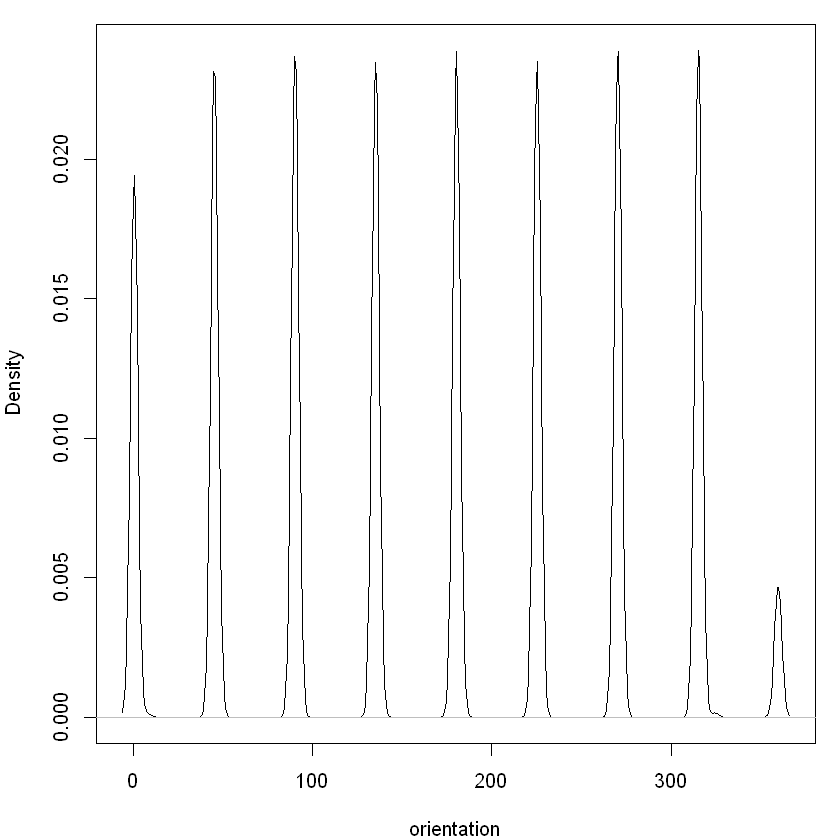

In [5]:
oldPar = par(mar = c(4, 4, 1, 1))
plot(density(offline$orientation, bw = 2), 
 xlab = "orientation", main = "")
par(oldPar)
dev.off()

roundOrientation = function(angles) {
  refs = seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}

offline$angle = roundOrientation(offline$orientation)

#pdf(file = "Geo_BoxplotAngle.pdf", width = 10)
oldPar = par(mar = c(4, 4, 1, 1))

par(oldPar)
dev.off()

### Code for MAC Address A Data Cleaning

In [3]:
readData = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline0 = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline0) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline0 = offline0[ offline0$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline0 = offline0[ , !( names(offline0) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline0 = offline0[ offline0$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline0[ numVars ] = lapply(offline0[ numVars ], as.numeric)

    # convert time to POSIX
    offline0$rawTime = offline0$time
    offline0$time = offline0$time/1000
    class(offline0$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline0$angle = roundOrientation(offline0$orientation)
      
    return(offline0)
  }

In [6]:
offlineRedo = readData()
macChannel0 = with(offlineRedo, table(mac))
apply(macChannel0, 1, function(x) sum(x > 0))

00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
                1                 1                 1                 1 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1

### Code for MAC Address A Predictions 

In [41]:
macs = unique(offlineSummaryRedo$mac)
online = readData("online.final.trace.txt", subMacs = macs)

online$posXY = paste(online$posX, online$posY, sep = "-")

length(unique(online$posXY))

tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(online, 
             by(online, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 6,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummaryRedo = do.call("rbind", byLoc)  

dim(onlineSummaryRedo)

[1] 60

            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 593   0   0   0   0
  0.15-9.42    0   0 606   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 573   0   0
  0.47-8.2   590   0   0   0   0   0   0   0
  0.78-10.94 586   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 583   0   0   0

[1] 60 11

In [42]:
names(onlineSummaryRedo)
m = 3; angleNewObs = 230
refs = seq(0, by = 45, length  = 8)
nearestAngle = roundOrientation(angleNewObs)
  
if (m %% 2 == 1) {
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
} else {
  m = m + 1
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  if (sign(angleNewObs - nearestAngle) > -1) 
    angles = angles[ -1 ]
  else 
    angles = angles[ -m ]
}
angles = angles + nearestAngle
angles[angles < 0] = angles[ angles < 0 ] + 360
angles[angles > 360] = angles[ angles > 360 ] - 360

[1] "posXY"             "posX"              "posY"             
 [4] "orientation"       "angle"             "00:0f:a3:39:e1:c0"
 [7] "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81" "00:14:bf:b1:97:8a"
[10] "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

In [43]:
offlineSubset = 
  offlineSummaryRedo[ offlineSummaryRedo$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

In [44]:
trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubset = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

In [45]:
train130 = selectTrain(130, offlineSummaryRedo, m = 3)

head(train130)

length(train130[[1]])

findNN = function(newSignal, trainSubset) {
  diffs = apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}

,posXY,posX,posY,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-52,-66,-63,-36,-64,-55
0-1,0-1,0,1,-53,-65,-64,-39,-65,-59
0-10,0-10,0,10,-56,-66,-69,-45,-67,-50
0-11,0-11,0,11,-55,-67,-70,-48,-67,-55
0-12,0-12,0,12,-56,-70,-72,-45,-67,-50
0-13,0-13,0,13,-55,-71,-73,-43,-69,-54


[1] 166

In [46]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkRedo = predXY(newSignals = onlineSummaryRedo[ , 6:11], 
                 newAngles = onlineSummaryRedo[ , 4], 
                 offlineSummaryRedo, numAngles = 3, k = 6)
#estXYkRedo

### MAC Address A Alternative Location Methodology

In [47]:
predXYalt = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

 estXY= lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) sum((1/(x+0.01)*x)/sum(1/(x[1:k]+0.01))  )))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkRedoalt = predXYalt(newSignals = onlineSummaryRedo[ , 6:11], 
                 newAngles = onlineSummaryRedo[ , 4], 
                 offlineSummaryRedo, numAngles = 3, k = 6)

#estXYkRedoalt
#length(estXYkRedoalt)
#((1/(x+0.00001))*(x))/


In [62]:
calcError = 
function(estXY, actualXY) 
   sum( rowSums( (estXY - actualXY)^2) )

actualXYRedo = onlineSummaryRedo[ , c("posX", "posY")]
sapply(list(estXYkRedo,estXYkRedoalt), calcError, actualXYRedo)

[1] 2.7e+02 1.2e+07

### Code for MAC Address B Data Cleaning

In [7]:
readDataNew = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline1 = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline1) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline1 = offline1[ offline1$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline1 = offline1[ , !( names(offline1) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline1 = offline1[ offline1$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline1[ numVars ] = lapply(offline1[ numVars ], as.numeric)

    # convert time to POSIX
    offline1$rawTime = offline1$time
    offline1$time = offline1$time/1000
    class(offline1$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline1$angle = roundOrientation(offline1$orientation)
      
    return(offline1)
  }

In [8]:
offlinenew = readDataNew()
macChannel1 = with(offlinenew, table(mac))
apply(macChannel1, 1, function(x) sum(x > 0))

00:0f:a3:39:dd:cd 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
                1                 1                 1                 1 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1

### Code for MAC Address B Predictions 

In [48]:
macs = unique(offlineSummarynew$mac)
online = readData("online.final.trace.txt", subMacs = macs)

online$posXY = paste(online$posX, online$posY, sep = "-")

length(unique(online$posXY))

tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(online, 
             by(online, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 6,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummarynew = do.call("rbind", byLoc)  

dim(onlineSummarynew)

[1] 60

            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 594   0   0   0   0
  0.15-9.42    0   0 608   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 574   0   0
  0.47-8.2   591   0   0   0   0   0   0   0
  0.78-10.94 585   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 581   0   0   0

[1] 60 11

In [49]:
names(onlineSummarynew)
m = 3; angleNewObs = 230
refs = seq(0, by = 45, length  = 8)
nearestAngle = roundOrientation(angleNewObs)
  
if (m %% 2 == 1) {
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
} else {
  m = m + 1
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  if (sign(angleNewObs - nearestAngle) > -1) 
    angles = angles[ -1 ]
  else 
    angles = angles[ -m ]
}
angles = angles + nearestAngle
angles[angles < 0] = angles[ angles < 0 ] + 360
angles[angles > 360] = angles[ angles > 360 ] - 360

[1] "posXY"             "posX"              "posY"             
 [4] "orientation"       "angle"             "00:0f:a3:39:dd:cd"
 [7] "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81" "00:14:bf:b1:97:8a"
[10] "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

In [50]:
offlineSubset = 
  offlineSummarynew[ offlineSummarynew$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

In [51]:
trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubset = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

In [52]:
train130 = selectTrain(130, offlineSummarynew, m = 3)

head(train130)

length(train130[[1]])

findNN = function(newSignal, trainSubset) {
  diffs = apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}

,posXY,posX,posY,00:0f:a3:39:dd:cd,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-72,-66,-63,-36,-64,-55
0-1,0-1,0,1,-70,-65,-64,-39,-65,-59
0-10,0-10,0,10,-70,-66,-69,-45,-67,-50
0-11,0-11,0,11,-71,-67,-70,-48,-67,-55
0-12,0-12,0,12,-69,-70,-72,-45,-67,-50
0-13,0-13,0,13,-73,-71,-73,-43,-69,-54


[1] 166

In [53]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYknew = predXY(newSignals = onlineSummarynew[ , 6:11], 
                 newAngles = onlineSummarynew[ , 4], 
                 offlineSummarynew, numAngles = 3, k = 6)

### MAC Address B Alternative Location Methodology

In [54]:
predXYalt = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) sum(((1/(x+0.01))*(x))/sum(1/(x[1:k]+0.01)) )))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYknewalt = predXYalt(newSignals = onlineSummarynew[ , 6:11], 
                 newAngles = onlineSummarynew[ , 4], 
                 offlineSummarynew, numAngles = 3, k = 6)

In [63]:
calcError = 
function(estXY, actualXY) 
   sum( rowSums( (estXY - actualXY)^2) )

actualXYnew = onlineSummarynew[ , c("posX", "posY")]
sapply(list(estXYknew,estXYknewalt), calcError, actualXYnew)

[1] 2.5e+02 1.2e+07

### Code for Both MAC Addresses

In [9]:
readDataBoth = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline2 = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline2) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline2 = offline2[ offline2$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline2 = offline2[ , !( names(offline2) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline2 = offline2[ offline2$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline2[ numVars ] = lapply(offline2[ numVars ], as.numeric)

    # convert time to POSIX
    offline2$rawTime = offline2$time
    offline2$time = offline2$time/1000
    class(offline2$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline2$angle = roundOrientation(offline2$orientation)
      
    return(offline2)
  }

In [10]:
offlineBoth = readDataBoth()
macChannel2 = with(offlineBoth, table(mac))
apply(macChannel2, 1, function(x) sum(x > 0))

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

### Code for Both MAC Address Predictions

In [55]:
macs = unique(offlineSummaryBoth$mac)
online = readData("online.final.trace.txt", subMacs = macs)

online$posXY = paste(online$posX, online$posY, sep = "-")

length(unique(online$posXY))

tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(online, 
             by(online, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 7,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummaryBoth = do.call("rbind", byLoc)  

dim(onlineSummaryBoth)

[1] 60

            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 704   0   0   0   0
  0.15-9.42    0   0 717   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 684   0   0
  0.47-8.2   701   0   0   0   0   0   0   0
  0.78-10.94 695   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 691   0   0   0

[1] 60 12

In [56]:
names(onlineSummaryBoth)
m = 3; angleNewObs = 230
refs = seq(0, by = 45, length  = 8)
nearestAngle = roundOrientation(angleNewObs)
  
if (m %% 2 == 1) {
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
} else {
  m = m + 1
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  if (sign(angleNewObs - nearestAngle) > -1) 
    angles = angles[ -1 ]
  else 
    angles = angles[ -m ]
}
angles = angles + nearestAngle
angles[angles < 0] = angles[ angles < 0 ] + 360
angles[angles > 360] = angles[ angles > 360 ] - 360

[1] "posXY"             "posX"              "posY"             
 [4] "orientation"       "angle"             "00:0f:a3:39:dd:cd"
 [7] "00:0f:a3:39:e1:c0" "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81"
[10] "00:14:bf:b1:97:8a" "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

In [57]:
offlineSubset = 
  offlineSummaryBoth[ offlineSummaryBoth$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 7,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

In [58]:
trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubset = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

In [59]:
train130 = selectTrain(130, offlineSummaryBoth, m = 3)

head(train130)

length(train130[[1]])

findNN = function(newSignal, trainSubset) {
  diffs = apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}

,posXY,posX,posY,00:0f:a3:39:dd:cd,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-72,-52,-66,-63,-36,-64,-55
0-1,0-1,0,1,-70,-53,-65,-64,-39,-65,-59
0-10,0-10,0,10,-70,-56,-66,-69,-45,-67,-50
0-11,0-11,0,11,-71,-55,-67,-70,-48,-67,-55
0-12,0-12,0,12,-69,-56,-70,-72,-45,-67,-50
0-13,0-13,0,13,-73,-55,-71,-73,-43,-69,-54


[1] 166

In [60]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkBoth = predXY(newSignals = onlineSummaryBoth[ , 6:11], 
                 newAngles = onlineSummaryBoth[ , 4], 
                 offlineSummaryBoth, numAngles = 3, k = 6)

### Both MAC Address Althernative Location Methodology

In [61]:
predXYalt = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) sum(((1/(x+0.01))*(x))/sum(1/(x[1:k]+0.01)) )))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkBothalt = predXYalt(newSignals = onlineSummaryBoth[ , 6:11], 
                 newAngles = onlineSummaryBoth[ , 4], 
                 offlineSummaryBoth, numAngles = 3, k = 6)
#estXYkBothalt
#nrow(estXYkBothalt)

In [64]:
calcError = 
function(estXY, actualXY) 
   sum( rowSums( (estXY - actualXY)^2) )

actualXYBoth = onlineSummaryBoth[ , c("posX", "posY")]
sapply(list(estXYkBoth,estXYkBothalt), calcError, actualXYBoth)


[1] 2.3e+02 1.2e+07